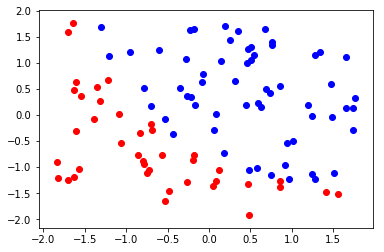

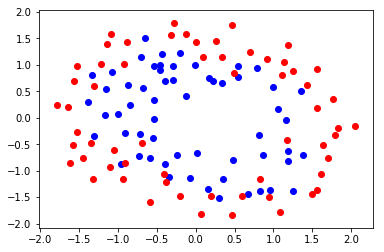

In [16]:
#Q1 
import numpy as np
import matplotlib.pyplot as plt

colors=["RED","BLUE"]
df = pd.read_excel(r'/home/rohan/Downloads/ex2data1-logistic.xls')
x1 = np.array(df['x1'])
x1 = (x1-x1.mean())/np.std(x1)
x2 = np.array(df['x2'])
x2 = (x2-x2.mean())/np.std(x2)
y = np.array(df['y'])

for i in range(len(x1)):
    plt.scatter(x1[i],x2[i],color = colors[y[i]])
plt.show()

df = pd.read_excel(r'/home/rohan/Downloads/ex2data2-logistic.xls')
x1 = np.array(df['x1'])
x1 = (x1-x1.mean())/np.std(x1)
x2 = np.array(df['x2'])
x2 = (x2-x2.mean())/np.std(x2)
y = np.array(df['y'])

for i in range(len(x1)):
    plt.scatter(x1[i],x2[i],color = colors[y[i]])
plt.show()

In [18]:
#Q2
from sympy import *
import numpy as np
import pandas as pd
import math as m
import random
z = Symbol('z')
g = 1/(1+exp(-z))
g = lambdify(z,g,'numpy')

df = pd.read_excel(r'/home/rohan/Downloads/ex2data1-logistic.xls')
x1 = np.array(df['x1'])
x1 = (x1-x1.mean())/np.std(x1)
x2 = np.array(df['x2'])
x2 = (x2-x2.mean())/np.std(x2)
y = np.array(df['y'])



temp = np.ones((len(x1),1))
X = np.c_[temp,x1,x2]
randomize = np.arange(len(X))
random.shuffle(randomize)
X = X[randomize]
y = y[randomize]
test_input=X[int(0.9*len(X)):]
X=X[:int(0.9*len(X))]
X=X.T
test_output=y[int(0.9*len(y)):]
y=y[:int(0.9*len(y))]
alpha = 0.01
size=3
theta_prev = [5]*size
theta = [0]*size

for i in range(3):
    theta[i] = theta_prev[i]+alpha*np.sum((y-(g(np.matmul(theta_prev,X)))*X[i]))
    
min_diff=1e-8
while abs(theta[0]-theta_prev[0])>=min_diff or abs(theta[1]-theta_prev[1])>=min_diff or abs(theta[2]-theta_prev[2])>=min_diff:
    theta_prev = theta
    for i in range(3):
        theta[i] = theta_prev[i]+alpha*np.sum((y-(g(np.matmul(theta_prev,X)))*X[i]))

pred_value=[]
for i in range(len(test_input)):
    if g(np.matmul(theta,test_input[i]))<=0.5:
        pred_value.append(0)
    else:
        pred_value.append(1)
count=0

for i in range(len(test_input)):
    if pred_value[i]==test_output[i]:
        count+=1
print(f'Accuracy = {count/len(test_input)*100}')

Accuracy = 90.0


In [67]:
#Q2
from sympy import *
import numpy as np
import pandas as pd
import math as m
import random
z = Symbol('z')
g = 1/(1+exp(-z))
g = lambdify(z,g,'numpy')

df = pd.read_excel(r'/home/rohan/Downloads/ex2data2-logistic.xls')
x1 = np.array(df['x1'])
x1 = (x1-x1.mean())/np.std(x1)
x2 = np.array(df['x2'])
x2 = (x2-x2.mean())/np.std(x2)
y = np.array(df['y'])

temp = np.ones((len(x1),1))
X = np.c_[temp,x1*x1,x2*x2,x1*x2]
randomize = np.arange(len(X))
random.shuffle(randomize)
X = X[randomize]
y = y[randomize]
random.shuffle(X)
test_input=X[int(0.9*len(X)):]
X=X[:int(0.9*len(X))]
X=X.T
test_output=y[int(0.9*len(y)):]
y=y[:int(0.9*len(y))]
alpha = 0.01
size=4
theta_prev = [5]*size
theta = [0]*size

for i in range(3):
    theta[i] = theta_prev[i]+alpha*np.sum((y-(g(np.matmul(theta_prev,X)))*X[i]))
    
min_diff=1e-7
while abs(theta[0]-theta_prev[0])>=min_diff or abs(theta[1]-theta_prev[1])>=min_diff or abs(theta[2]-theta_prev[2])>=min_diff or abs(theta[3]-theta_prev[3])>=min_diff:
    theta_prev = theta
    for i in range(3):
        theta[i] = theta_prev[i]+alpha*np.sum((y-(g(np.matmul(theta_prev,X)))*X[i]))

pred_value=[]
for i in range(len(test_input)):
    if g(np.matmul(theta,test_input[i]))>0.5:
        pred_value.append(0)
    else:
        pred_value.append(1)
count=0

for i in range(len(test_input)):
    if pred_value[i]==test_output[i]:
        count+=1
print(f'Accuracy = {count/len(test_input)*100}')

Accuracy = 75.0
